In [24]:
using DifferentialEquations
using Plots; gr()
using Roots
using LinearAlgebra

In [149]:
# Michaelis-Menten
MM = (S, K) -> S/(S + K)

function rhs_binding_eq(dX, X, p, t)
    UADP, UATP, PADP, PATP = X
    k_ATPase, k_d, k_p, k_exU, k_exP, K_dU, K_dP, A, C = p
    
    # assuming binding is at equilibrium. solve for free KaiA
    f = x -> (x - A)*(x + K_dU)*(x + K_dP) + (UADP + UATP)*x*(x + K_dP) +
        (PADP + PATP)*x*(x + K_dU)
    A_free = find_zero(f, (0, A))
    
    # UADP UATP PADP PATP
    R = [0   k_ATPase   0   0
        MM(A_free, K_dU)*k_exU   0   k_d   0
        0   k_p   0   k_ATPase
        0   0   MM(A_free, K_dP)*k_exP   0]
    R -= I(size(R)[1]) .* sum(R, dims=1)    # conservation
    
    dX[:] = R*X
end;

In [216]:
# param
k_ATPase = 1    # h^-1
k_d = 1
k_p = 1
k_exU = 0.1
k_exP = 100
K_dU = 0.12    # uM
K_dP = 0.12
A = 0.2
C = 3.5;

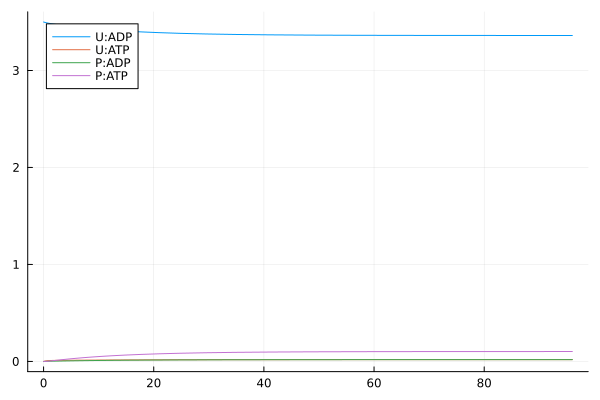

In [217]:
# UADP UATP PADP PATP
X0 = [C, 0, 0, 0]

p = [k_ATPase, k_d, k_p, k_exU, k_exP, K_dU, K_dP, A, C]

TMAX = 96

prob = ODEProblem(rhs_binding_eq, X0, (0, TMAX), p)
sol = solve(prob)

plot(sol.t, hcat(sol.u...)', label=["U:ADP" "U:ATP" "P:ADP" "P:ATP"], leg=:topleft)

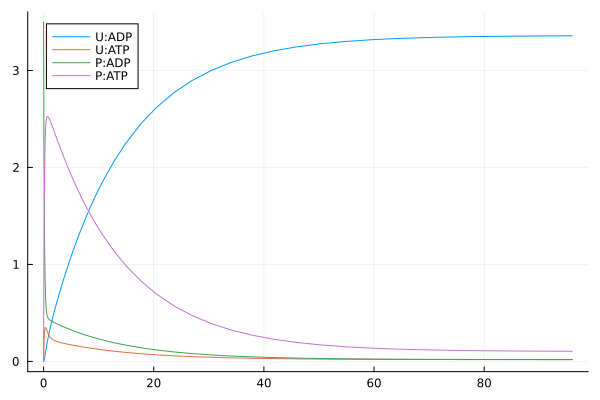

In [218]:
# UADP UATP PADP PATP
X0 = [0, 0, C, 0]

p = [k_ATPase, k_d, k_p, k_exU, k_exP, K_dU, K_dP, A, C]

TMAX = 96

prob = ODEProblem(rhs_binding_eq, X0, (0, TMAX), p)
sol = solve(prob)

plot(sol.t, hcat(sol.u...)', label=["U:ADP" "U:ATP" "P:ADP" "P:ATP"], leg=:topleft)